In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


<div class="alert alert-block alert-info">
Version should be greater than or equal to 0.19.1
</div>

In [2]:
#External Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

#External Algos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Custom Libs
from process import getDataset

#For display

from IPython.display import HTML, display,Image
import tabulate

# Fetch Dataset

In [3]:
#Fetch Dataset
hr = getDataset('HR_comma_sep.csv')
# hr = pd.DataFrame(hr['data'],columns = hr['headers']).convert_objects(convert_numeric=True)
hr = pd.DataFrame(hr['data'],columns = hr['headers']).infer_objects()
print("DataSet:")
hr

DataSet:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.8,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.5,2,153,3,0,1,0,sales,low
6,0.1,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# PreProcessing

In [4]:
#Encode Salary
salaryEncoder = LabelEncoder()
encodedSalary = salaryEncoder.fit_transform(hr['salary'])

#Representation in Encoder
table=[]
for i in list(salaryEncoder.classes_):
    table.append([i,salaryEncoder.transform([i])])

display(HTML(tabulate.tabulate(table, headers=['Class', 'Label'],tablefmt='html')))

Class,Label
high,0
low,1
medium,2


In [5]:
#Create datasets
# X contains 
# satisfaction_level
#,last_evaluation
#,number_project
#,average_montly_hours
#,time_spend_company
#,Work_accident
#,promotion_last_5years
#,salary
x = hr.drop(columns = ['left','sales'])#.infer_objects()
#Y contains Left
y = pd.to_numeric(hr['left'].values)

In [6]:
#Replace salary with it's encoded values
x['salary'] = encodedSalary

In [7]:
print("Encoded Inputs: ")
x

Encoded Inputs: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.8,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
5,0.41,0.5,2,153,3,0,0,1
6,0.1,0.77,6,247,4,0,0,1
7,0.92,0.85,5,259,5,0,0,1
8,0.89,1,5,224,5,0,0,1
9,0.42,0.53,2,142,3,0,0,1


In [8]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [9]:
print("Feature Scaled Inputs: ")
x

Feature Scaled Inputs: 


array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
        -0.14741182,  1.04300352],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
        -0.14741182,  1.04300352],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
        -0.14741182, -0.55495458],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458]])

# CrossValidation

In [10]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Training

### DecisionTree Classifier with generic HyperParameters

In [11]:
# Fitting Decision Tree Classifier to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3, min_samples_leaf=5)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
acc

0.9472

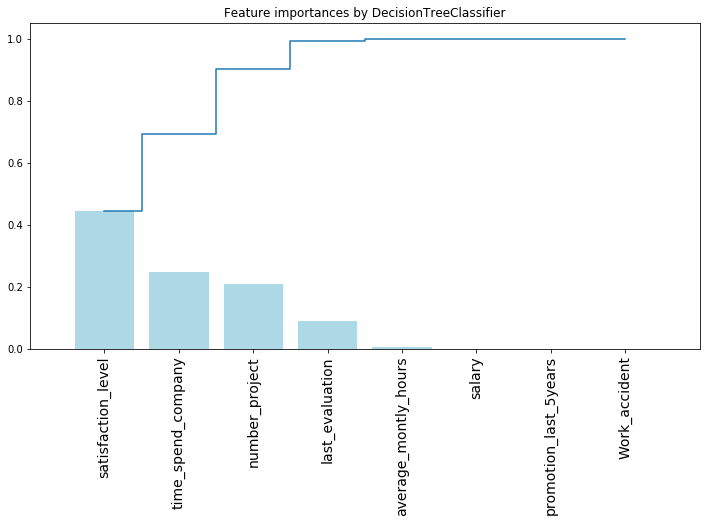

In [12]:
## plot the importances ##
importances = classifier.feature_importances_
feat_names = hr.drop(['left','sales'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## GridSearch For most efficient D-Tree classifier

In [13]:
parameters = {
    "criterion": ["gini","entropy"],
    "random_state":[0],
    "max_depth":list(range(3,11)),
    "min_samples_leaf":list(range(1,11))
}

In [14]:
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'random_state': [0], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'random_state': 0}

### Best Classifier Accuracy score

In [23]:
import pprint
pp = pprint.PrettyPrinter(indent=4,compact=True,width=10)
y_true, y_pred = y_test, grid_search.predict(x_test)
print("Classifier best hyper parameters")
pp.pprint(grid_search.best_params_)
print("Accuracy of the DecisionTree classifier =  %s%%" % (accuracy_score(y_true, y_pred)*100))
# grid_search.grid_scores_ #Mean & STD dev for every combination

Classifier best hyper parameters
{   'criterion': 'gini',
    'max_depth': 8,
    'min_samples_leaf': 1,
    'random_state': 0}
Accuracy of the DecisionTree classifier =  98.18666666666667%


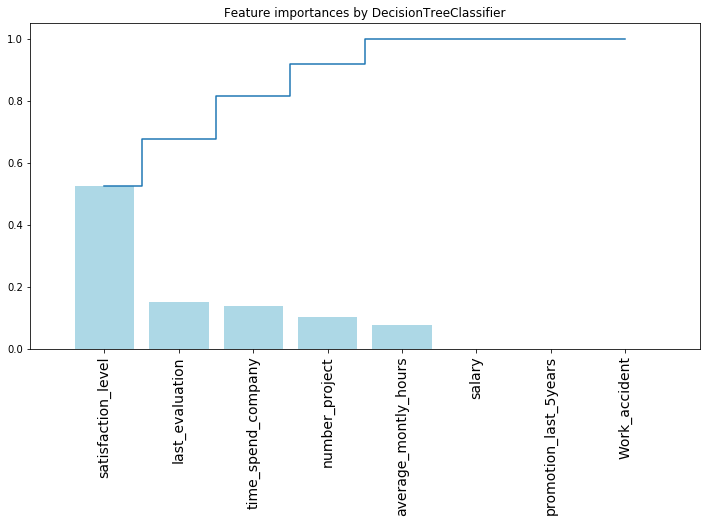

In [17]:
## plot the importances ##
importances = grid_search.best_estimator_.feature_importances_
feat_names = hr.drop(['left','sales'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Visualize Best Decision Tree Classifier
<div class="alert alert-block alert-info">
Should have GraphViz Installed on the Jupyter Server
</div>

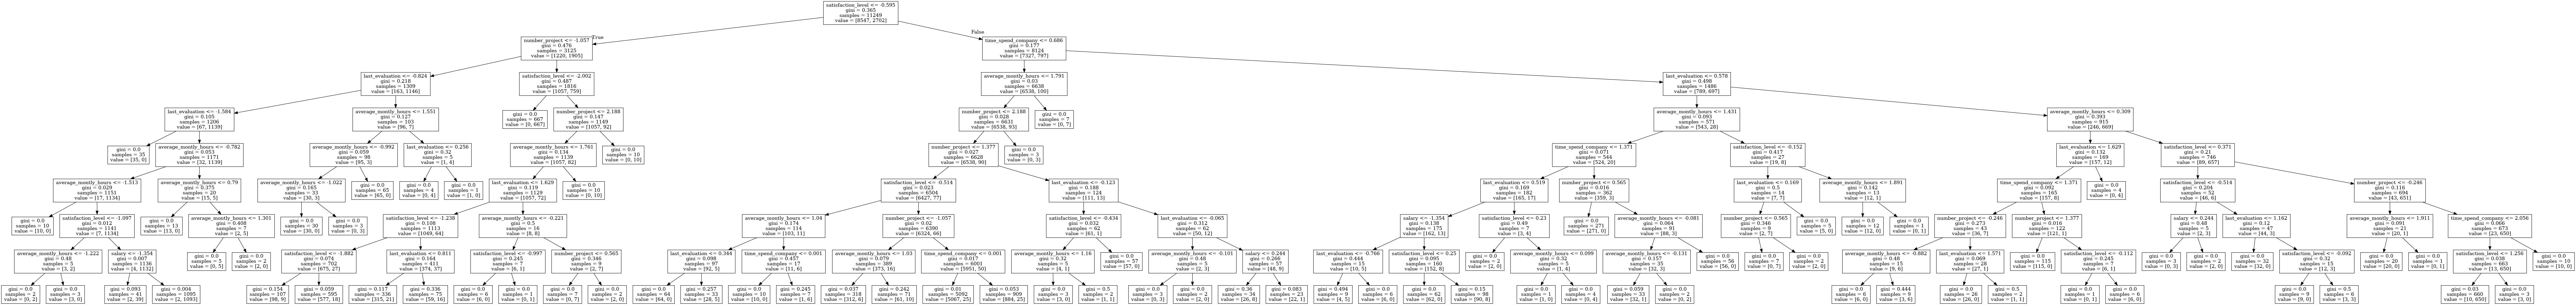

In [24]:
#Convert tree to image Dot format
from sklearn import tree
tree.export_graphviz(grid_search.best_estimator_, out_file='tree.dot', feature_names=hr.drop(columns = ['left','sales']).columns)

#Convert dot file to PNG
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

Image(filename='tree.png') 

In [26]:
# benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html